In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv(r"datasets\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [20]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
# There are 21 features 
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
# From the below line we can get an I deas on how much data is empty in terms of percentage
temp = (data.isnull().sum() /data.shape[0] )*100
temp

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [24]:
for column in data.columns:
    # print(data[column].unique())
    if len(data[column].unique()) < 20:
        print("Column: ",column , "\tUnique Values : ",data[column].unique())
    else:
        pass

Column:  gender 	Unique Values :  ['Female' 'Male']
Column:  SeniorCitizen 	Unique Values :  [0 1]
Column:  Partner 	Unique Values :  ['Yes' 'No']
Column:  Dependents 	Unique Values :  ['No' 'Yes']
Column:  PhoneService 	Unique Values :  ['No' 'Yes']
Column:  MultipleLines 	Unique Values :  ['No phone service' 'No' 'Yes']
Column:  InternetService 	Unique Values :  ['DSL' 'Fiber optic' 'No']
Column:  OnlineSecurity 	Unique Values :  ['No' 'Yes' 'No internet service']
Column:  OnlineBackup 	Unique Values :  ['Yes' 'No' 'No internet service']
Column:  DeviceProtection 	Unique Values :  ['No' 'Yes' 'No internet service']
Column:  TechSupport 	Unique Values :  ['No' 'Yes' 'No internet service']
Column:  StreamingTV 	Unique Values :  ['No' 'Yes' 'No internet service']
Column:  StreamingMovies 	Unique Values :  ['No' 'Yes' 'No internet service']
Column:  Contract 	Unique Values :  ['Month-to-month' 'One year' 'Two year']
Column:  PaperlessBilling 	Unique Values :  ['Yes' 'No']
Column:  Paymen

In [25]:
for column in data.columns:
    # print(data[column].unique())
    if len(data[column].unique()) > 20:
        print("Column: ",column , 
              "\tUnique Values : ", data[column].unique(),
              "No. of Unique Values:",len(data[column].unique()) ,
              "\t Data type : ",data[column].dtypes)
    else:
        pass

Column:  customerID 	Unique Values :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] No. of Unique Values: 7043 	 Data type :  object
Column:  tenure 	Unique Values :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] No. of Unique Values: 73 	 Data type :  int64
Column:  MonthlyCharges 	Unique Values :  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] No. of Unique Values: 1585 	 Data type :  float64
Column:  TotalCharges 	Unique Values :  ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5'] No. of Unique Values: 6531 	 Data type :  object


In [26]:
# From the above code we need to change the data-type of "Total Chages" column to numeric type
# t\These are empty values

data["TotalCharges"] = pd.to_numeric(data["TotalCharges"],errors="coerce")
data["TotalCharges"].dtypes

dtype('float64')

In [27]:
temp = (data.isnull().sum() / data.shape[0] ) * 100
temp

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

There is 0.15 % of missing data in  "Total Charges column" let's deal with it...

<Axes: xlabel='TotalCharges', ylabel='Density'>

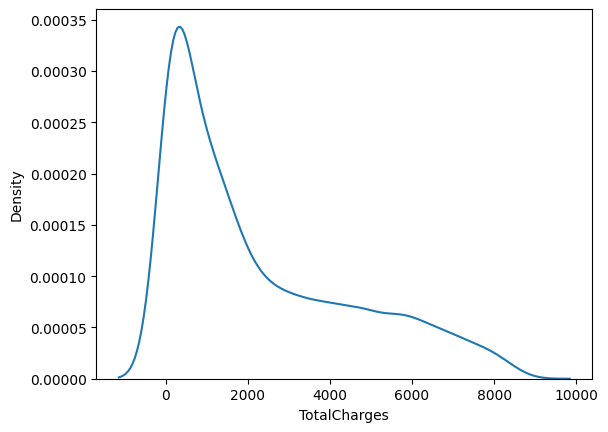

In [28]:
sns.kdeplot(data=data, x="TotalCharges")

In [29]:
# Lets go with Mean Imputation as the above graph is fairly 
# But before that , I wil create  a new column- copy of Total chages and impute that with MEAN IMPUTATION

data["New_TotalCharges"] = data["TotalCharges"].copy()


In [30]:
data["New_TotalCharges"].mean()

np.float64(2283.3004408418656)

In [31]:
data["New_TotalCharges"] =data["New_TotalCharges"].fillna(data["New_TotalCharges"].mean())


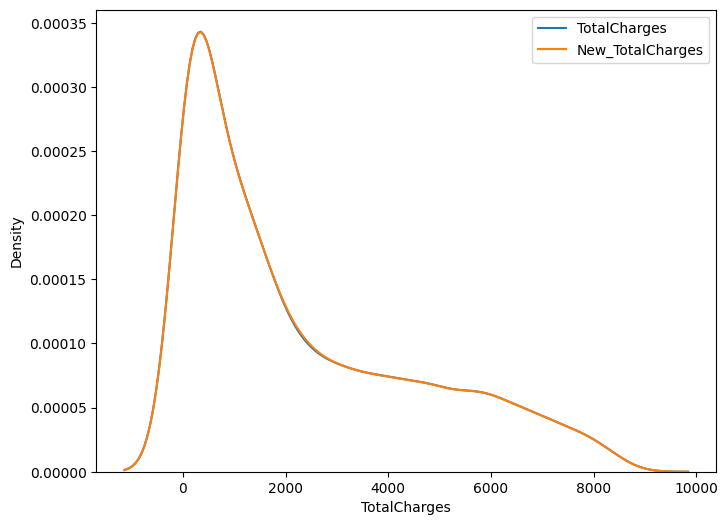

In [32]:
# Not much change after filling the data with Mean Imputation
plt.figure(figsize=(8, 6))

# Plot the KDE for column1
sns.kdeplot(data['TotalCharges'], label='TotalCharges')

# Plot the KDE for column2
sns.kdeplot(data['New_TotalCharges'], label='New_TotalCharges')

plt.legend()

In [33]:
# Removing the "New_Total charges" column and Filling the " Total charges" , so that 
# Wrote the below line of code in Below cell
#data = data.drop(columns=["New_TotalCharges"],axis=1)

# MEAN IMPUTATION:

data["TotalCharges"] =data["TotalCharges"].fillna(data["TotalCharges"].mean())
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,New_TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,151.65


In [34]:
# Dropping the unwanted columns which will not be required for prediction

data = data.drop(columns=["New_TotalCharges",'customerID'],axis=1)
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## DATA VISUALIZATION

In [35]:
# Lets Visualize the data , after that if we detect the outliars ,  then we can remove them
#  plot charts for both categorical and numerical columns in your dataset, we can create a function that handles both types of columns. 
# For numerical columns, we can plot histograms, box plots, or KDE plots. 
# For categorical columns, we can use count plots or bar charts.

##### Lets Visualize the data , after that if we detect the outliars ,  then we can remove them   

Plot charts for both categorical and numerical columns in your dataset.       
For numerical columns, we can plot histograms, box plots, or KDE plots.   
For categorical columns, we can use Frequency plots or bar charts.   

Categorical Features

In [44]:
categorical_columns = []
numerical_columns = []

for column in data.columns:
    if (data[column].dtypes == "object"):
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)
        
print("categorical_columns : ",categorical_columns)
print("numerical_columns : ",numerical_columns)


categorical_columns :  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
numerical_columns :  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [45]:
len(categorical_columns)

16

In [54]:
counter = 0
for i in range(0,4):
    for j in range(0,4):
        
        print(i,j,counter,categorical_columns[counter])
        counter +=1

0 0 0 gender
0 1 1 Partner
0 2 2 Dependents
0 3 3 PhoneService
1 0 4 MultipleLines
1 1 5 InternetService
1 2 6 OnlineSecurity
1 3 7 OnlineBackup
2 0 8 DeviceProtection
2 1 9 TechSupport
2 2 10 StreamingTV
2 3 11 StreamingMovies
3 0 12 Contract
3 1 13 PaperlessBilling
3 2 14 PaymentMethod
3 3 15 Churn


In [ ]:
# fig, axes = plt.subplots(4, 4, figsize=(15,12))
# fig.suptitle('Frequency distribution for categorical variables')


# x = sns.countplot(ax = axes[0,0], x="gender", order = data['gender'].value_counts().index, palette="tab10",
#                   data=data)
# axes[0,0].set_title('gender')
# axes[0,0].set(xlabel=None)
# axes[0,0].set(ylabel=None)
# for p in x.patches:
#     x.annotate(format(p.get_height()),(p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
#                xytext = (0, 10), textcoords = 'offset points')

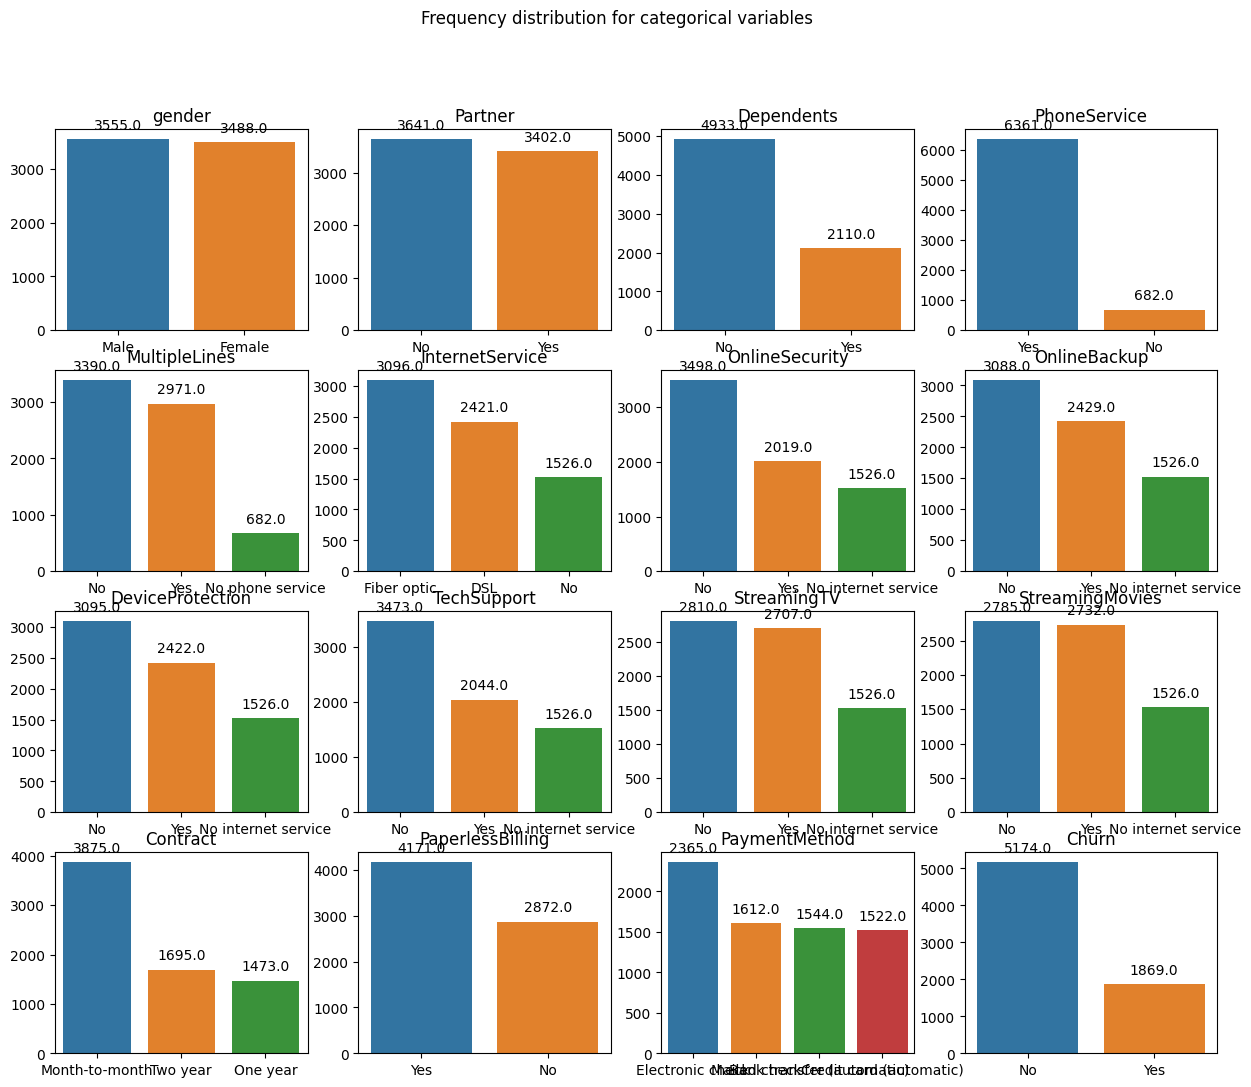

In [57]:
import warnings
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(4, 4, figsize=(15,12))
fig.suptitle('Frequency distribution for categorical variables')

counter = 0
for i in range(0,4):
    for j in range(0,4):
        
        #print(i,j,counter,categorical_columns[counter])
        
        x = sns.countplot(ax = axes[i,j], x=categorical_columns[counter], order = data[categorical_columns[counter]].value_counts().index, palette="tab10",
                  data=data)
        axes[i,j].set_title(categorical_columns[counter])
        axes[i,j].set(xlabel=None)
        axes[i,j].set(ylabel=None)
        for p in x.patches:
            x.annotate(format(p.get_height()),(p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                    xytext = (0, 10), textcoords = 'offset points')
            
        counter +=1


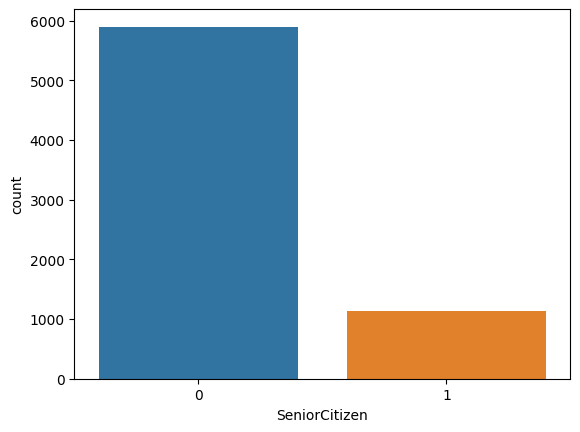

In [63]:
x = sns.countplot(x="SeniorCitizen", order = data['SeniorCitizen'].value_counts().index, palette="tab10",
                  data=data)

Numerical Features

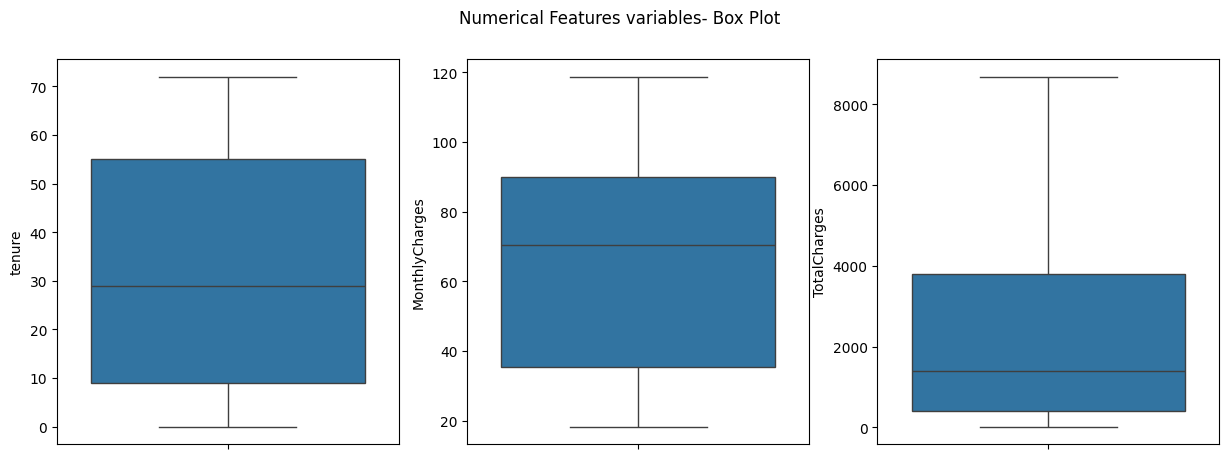

In [75]:
#sns.boxplot(data=data["tenure"])
# No outliars present after observing the boxplot 
fig, axes = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Numerical Features variables- Box Plot')

x = sns.boxplot(ax = axes[0],data=data['tenure'], palette="tab10")
x = sns.boxplot(ax = axes[1],data=data['MonthlyCharges'], palette="tab10")
x = sns.boxplot(ax = axes[2],data=data['TotalCharges'], palette="tab10")

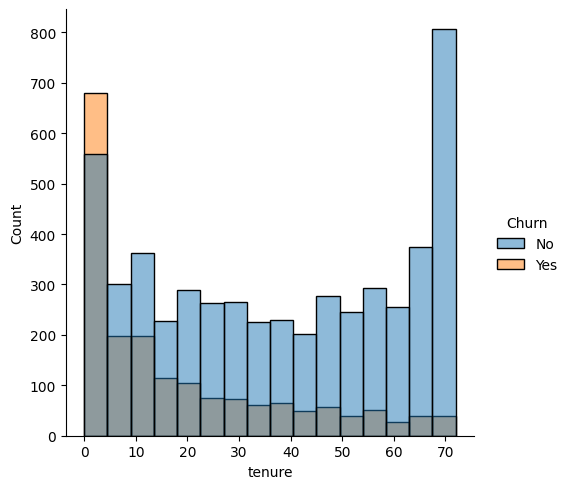

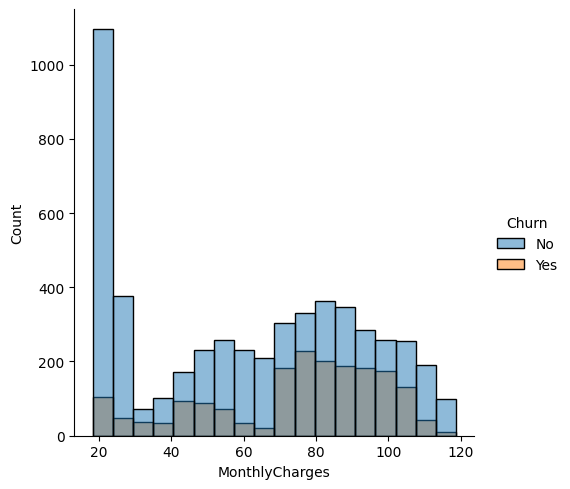

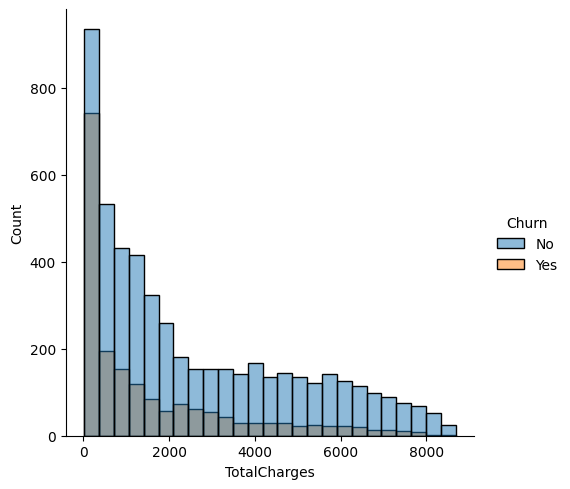

In [81]:
# Distribution Plot
sns.displot(data ,ax = axes[0],x='tenure', hue="Churn")
sns.displot(data,ax = axes[1],x='MonthlyCharges', hue="Churn")
sns.displot(data,ax = axes[2],x='TotalCharges', hue="Churn")

In [82]:
data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Data Transormation
    Here we are doing the data encoding using Labelencoder

In [91]:
from sklearn.preprocessing import LabelEncoder

#Initialize the label encoder
labelencoder = LabelEncoder()

# Verified
#temp = data.copy()  # making a deep copy to check the encoding

for column in data.columns:
    if data[column].dtype == "object":
        print(" Label Encoding,Encoded Column : ",column)
        data[column]= labelencoder.fit_transform(data[column]) 
    else:
        pass
    
data.head()


 Label Encoding,Encoded Column :  gender
 Label Encoding,Encoded Column :  Partner
 Label Encoding,Encoded Column :  Dependents
 Label Encoding,Encoded Column :  PhoneService
 Label Encoding,Encoded Column :  MultipleLines
 Label Encoding,Encoded Column :  InternetService
 Label Encoding,Encoded Column :  OnlineSecurity
 Label Encoding,Encoded Column :  OnlineBackup
 Label Encoding,Encoded Column :  DeviceProtection
 Label Encoding,Encoded Column :  TechSupport
 Label Encoding,Encoded Column :  StreamingTV
 Label Encoding,Encoded Column :  StreamingMovies
 Label Encoding,Encoded Column :  Contract
 Label Encoding,Encoded Column :  PaperlessBilling
 Label Encoding,Encoded Column :  PaymentMethod
 Label Encoding,Encoded Column :  Churn


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


#### Checking and Handling Imbalance Data

In [95]:
# Lets check the dependent feature "Churn" 

imbalance_check = (data["Churn"].value_counts(normalize=True) ) *100  # Normalize Parameter for Percentage 
imbalance_check

Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

    *We can say that the data is not highly Imbalance so , we would not do Sampling(Under or Over) here...

### Feature Selection 

In [99]:
correlation_data = data.corr()

Text(0.5, 1.0, 'Class Distribution Heatmap')

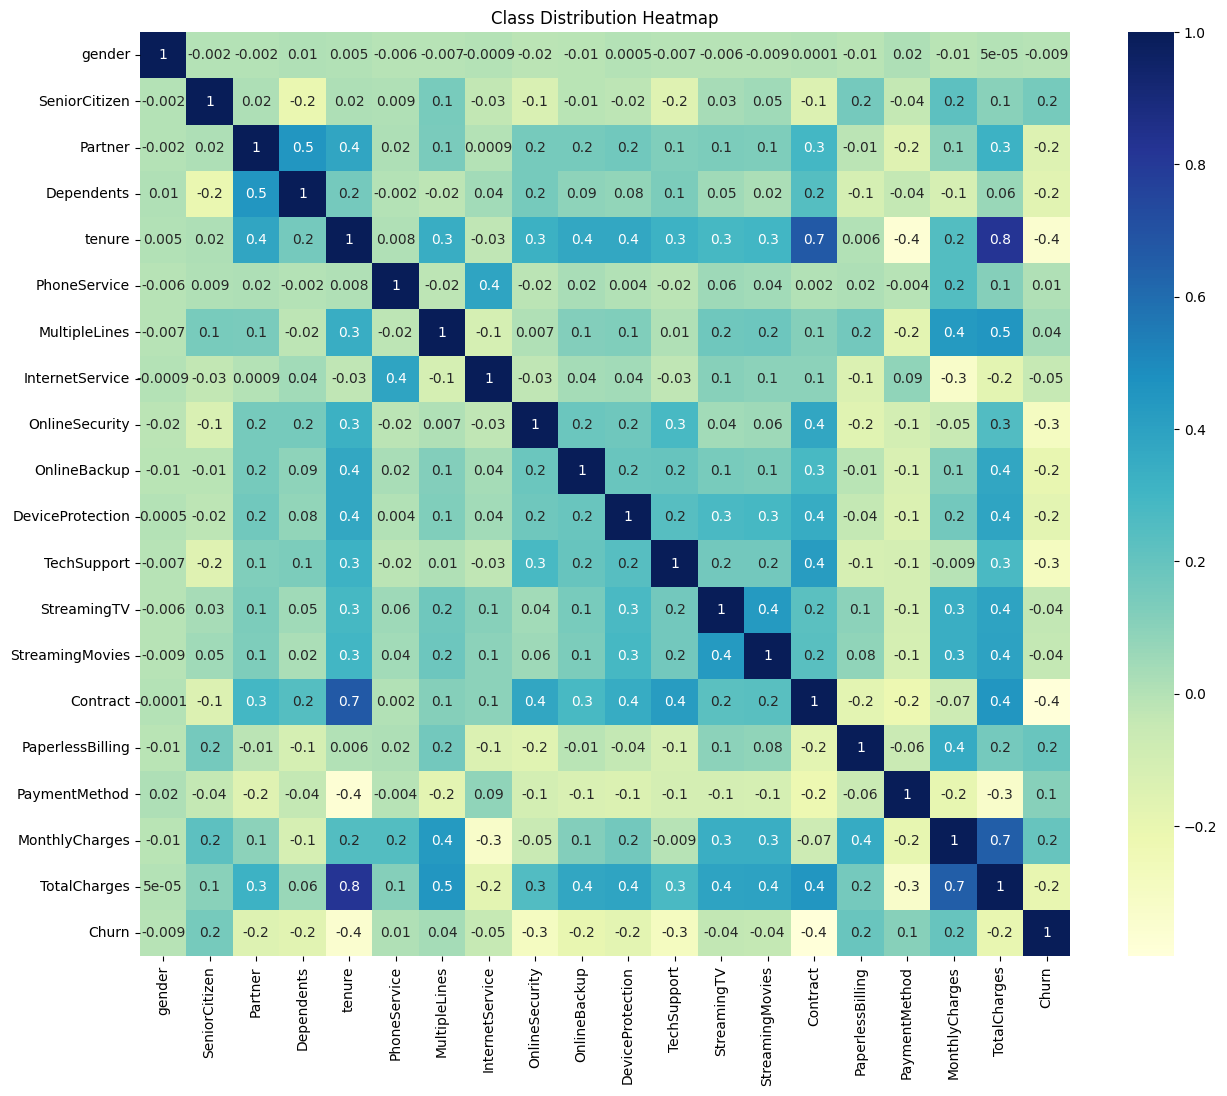

In [105]:
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_data, cmap='YlGnBu',annot=True,fmt='.1g')
plt.title('Class Distribution Heatmap')

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_result = calculate_vif(data)
print(vif_result)


             Feature        VIF
0             gender   1.954282
1      SeniorCitizen   1.372903
2            Partner   2.821468
3         Dependents   1.963655
4             tenure  14.609295
5       PhoneService  15.181513
6      MultipleLines   2.757229
7    InternetService   4.382320
8     OnlineSecurity   2.259598
9       OnlineBackup   2.460627
10  DeviceProtection   2.634216
11       TechSupport   2.394244
12       StreamingTV   3.240747
13   StreamingMovies   3.261910
14          Contract   4.174115
15  PaperlessBilling   2.888157
16     PaymentMethod   3.108100
17    MonthlyCharges  22.270306
18      TotalCharges  14.138743
19             Churn   1.861771


 You can use ANOVA (Analysis of Variance) to help determine whether to keep or drop a feature when you're dealing with high Variance Inflation Factor (VIF) values. Here’s how you can approach this:   

Steps to Use ANOVA for Feature Selection    


Understanding Your Variables:     

Target Variable: This should be categorical (e.g., different groups or categories).      
Feature Variable: This should be continuous (e.g., age, income).     

Perform ANOVA:    

Use ANOVA to test whether there are statistically significant differences in the means of the target variable across the groups defined by your feature.    
The null hypothesis (𝐻0) states that there is no difference between the means of the groups, while the alternative hypothesis (𝐻𝑎) states that at least one group mean is different.     

Interpreting the Results:   

If the ANOVA test shows a low p-value (typically < 0.05), it suggests that the feature is significantly associated with the target variable. In this case, you may want to keep the feature.     
If the p-value is high, you may consider dropping the feature, especially if it also has a high VIF value.   

Example Scenario   
Let's say you have a dataset with the following:

Target Variable: Income Level (categorical: Low, Medium, High)
Feature Variable: Age (continuous)
You can perform ANOVA to see if age significantly affects income levels.


In [108]:
# Please note that I got this info from web so decided to keep it here

# import pandas as pd
# import scipy.stats as stats

# # Sample Data
# temp_data = {
#     'Income_Level': ['Low', 'Medium', 'High', 'Low', 'Medium', 'High'],
#     'Age': [25, 30, 45, 22, 35, 50]
# }

# # Convert to DataFrame
# temp_df = pd.DataFrame(temp_data)

# # Perform ANOVA
# f_statistic, p_value = stats.f_oneway(
#     temp_df[temp_df['Income_Level'] == 'Low']['Age'],
#     temp_df[temp_df['Income_Level'] == 'Medium']['Age'],
#     temp_df[temp_df['Income_Level'] == 'High']['Age']
# )

# # Output the results
# print(f"F-statistic: {f_statistic}")
# print(f"P-value: {p_value}")

F-statistic: 29.89830508474576
P-value: 0.010441853147451625



Decision Making   

If p-value < 0.05:   
You reject the null hypothesis, indicating a significant difference in age among different income levels.    
In this case, you would likely want to keep the age feature, as it appears relevant to the target variable.    

If p-value ≥ 0.05:    
You fail to reject the null hypothesis, suggesting that age does not have a significant effect on income levels.    
Given the high VIF as well, you might consider dropping the age feature.     

Conclusion:      
Using ANOVA helps assess the relationship between your feature and the target variable. If a feature shows significant differences in the target variable, it suggests that the feature may be valuable for the model, even if it has a high VIF.    
However, if the ANOVA results are not significant, combined with a high VIF, it's a strong indication that you may want to drop that feature to improve model performance and interpretability.

In [119]:

import scipy.stats as stats

# Perform ANOVA for each continuous feature against churn
for feature in ['TotalCharges', 'MonthlyCharges', 'tenure','PhoneService']:
    f_statistic, p_value = stats.f_oneway(
        data[data['Churn'] == 1][feature],  # Churned customers
        data[data['Churn'] == 0][feature]   # Non-churned customers
    )
    print(f"Feature: {feature} | F-statistic: {f_statistic} | P-value: {p_value:.5f}")


Feature: TotalCharges | F-statistic: 291.62902117578534 | P-value: 0.00000
Feature: MonthlyCharges | F-statistic: 273.4637042077133 | P-value: 0.00000
Feature: tenure | F-statistic: 997.2680104991438 | P-value: 0.00000
Feature: PhoneService | F-statistic: 1.0042664747920644 | P-value: 0.31631


#### Retain Significant Features:  

TotalCharges, MonthlyCharges, and Tenure:   
    *Since all these features have very low p-values (much less than 0.05), they are significant predictors of churn and should be included in your model.   


Consider Dropping Non-Significant Features:        
    *PhoneService: The p-value of 0.31631 indicates that it does not provide significant information for predicting churn. If it also has a high VIF (indicating multicollinearity), this reinforces the decision to drop it.     

In [120]:
data =data.drop(columns=["PhoneService"],axis=1)
print(data.columns)
data.head()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')


,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


#### Splitting the data
    # We will use the Hold out method first...


In [123]:
X = data.drop(columns=["Churn"])
y = data["Churn"].values

In [127]:
print(X.shape)
X.head(2)

(7043, 18)


,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50


In [128]:
print(len(y))
y

7043


array([0, 0, 1, ..., 0, 1, 0])

In [129]:
# Hold out Method

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state = 40)

In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [132]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)   #Training Dataset

predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7146237576904875


In [135]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1553
           1       0.46      0.48      0.47       560

    accuracy                           0.71      2113
   macro avg       0.64      0.64      0.64      2113
weighted avg       0.72      0.71      0.72      2113



In [137]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7974443918599148


In [138]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1553
           1       0.66      0.48      0.56       560

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.71      2113
weighted avg       0.79      0.80      0.79      2113



In [133]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)


gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.7870326549929011


In [134]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1553
           1       0.62      0.51      0.56       560

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113

